In [48]:
#import dependencies
import pandas as pd

Getting the data 


In [49]:
# load the data file
file_path = "housing.csv"
housing = pd.read_csv(file_path)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Visualise to Gain insights about the data 

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


It is noted that index 4, total_bedrooms attribute has fewer Non-Null Count than the others, which means 207 districts (rows) do not have this feature

In [51]:
# find out more about the categorical value 
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


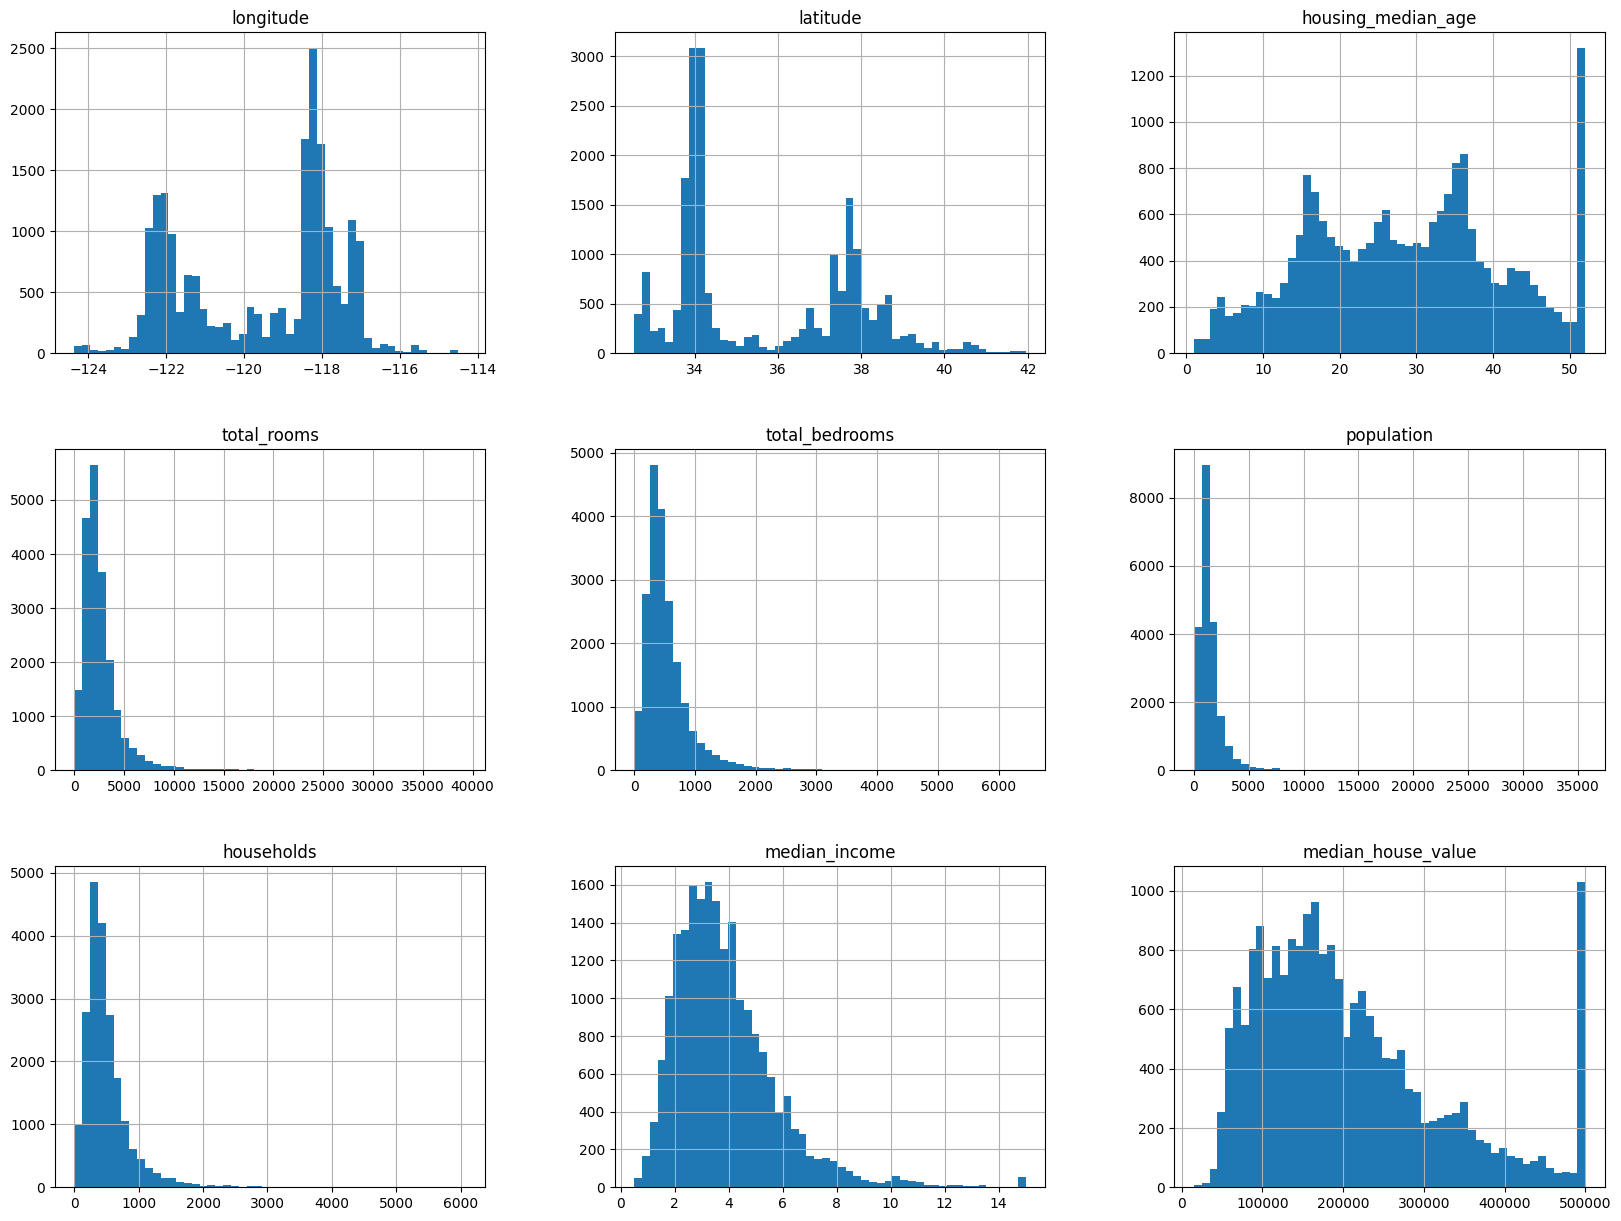

In [53]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Prepare the data for ML algorithms

In [54]:
# to use stratified sampling based on median_income
# create income category attributes with 5 categories 
import numpy as np
housing['income_cat'] = pd.cut(housing["median_income"],
                               bins= [0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

<Axes: >

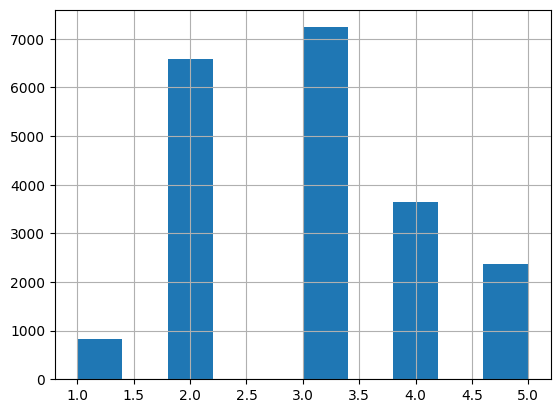

In [55]:
# Take a look on the newly created attribute
housing["income_cat"].hist()

In [56]:
# use stratified sampling based on the income class
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #generate a splitter object
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [57]:
# look at the income category proportions in the test set 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [58]:
# remove the added income_cat so the data is back to original 
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)
  

Visualise the data

In [59]:
# look only at the training set
housing_copy = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

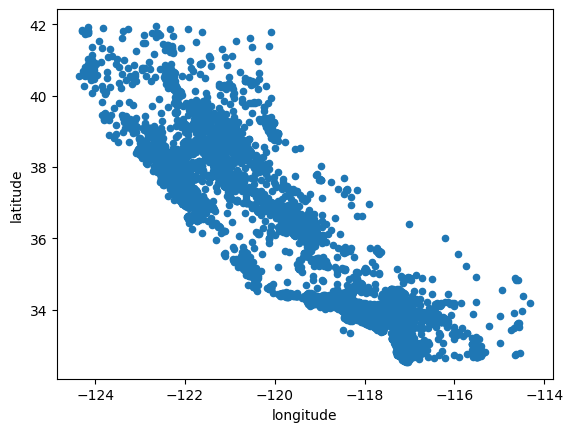

In [60]:
# plot a scatterplot of all districts using latitude and longitude
housing_copy.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

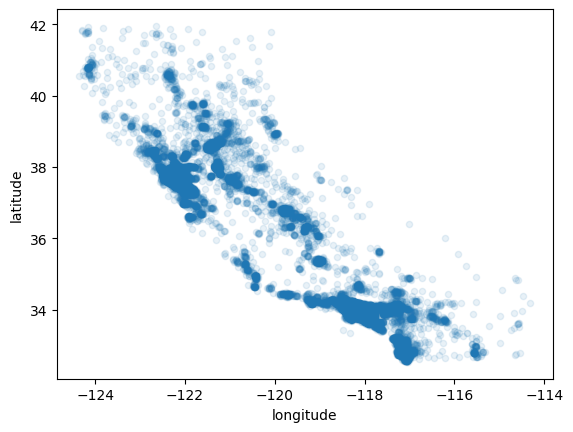

In [61]:
# to see the places with a high density of data points
housing_copy.plot(kind="scatter",x="longitude", y="latitude", alpha=0.1) #more transparent

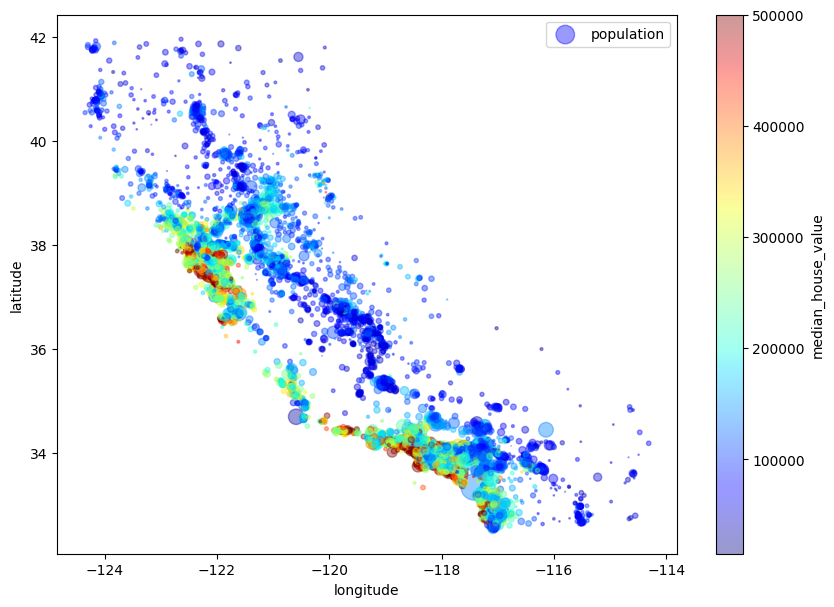

In [62]:
# looking at the prices
# the radius of each circle represents the disctrict's population
# the color represents the price 
# use pre-defined colour map cmap called jet, with blue means low and red means high
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing_copy["population"]/100, label="population", figsize=(10,7),
                  c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
)
plt.legend()

In [63]:
# compute the standard correlation coefficient between every pair of attributes 
corr_matrix = housing_copy.corr(numeric_only=True) # only for numeric values to prevent errors

In [64]:
# look at how much each attribute correlates to median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

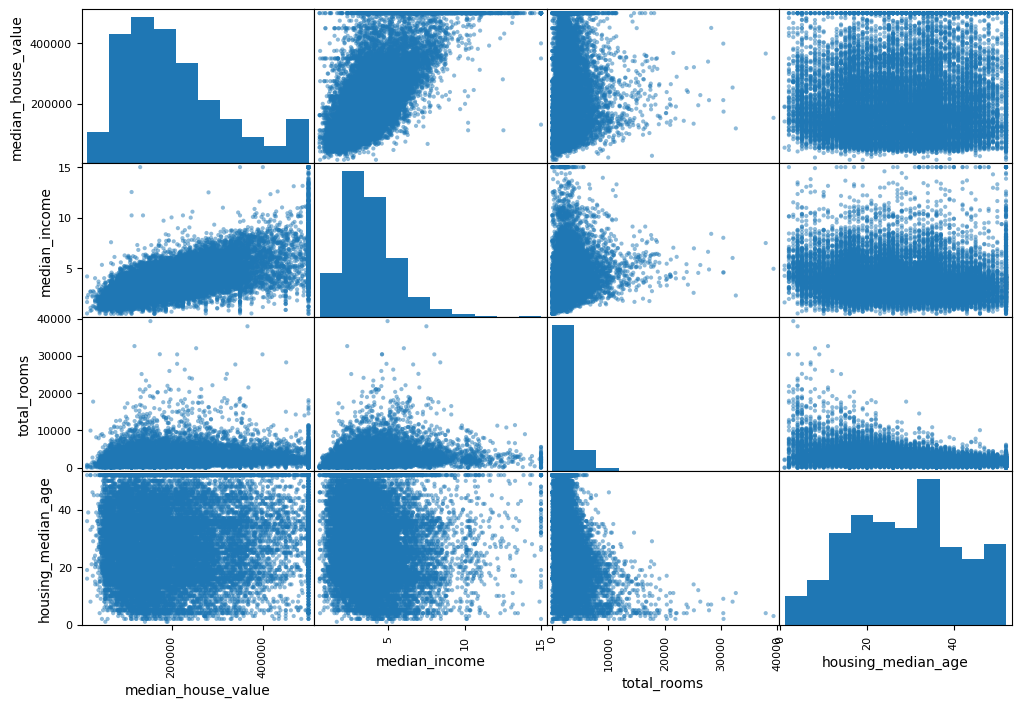

In [65]:
# use pandas' scatter_matrix function to plot attributes that are more likely related 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

The main diagonal is the histogram of the attribute, so that it will be more useful than a plot of an attribute against itself

The most promising attribute to predict the median house value is the median income 

<Axes: xlabel='median_income', ylabel='median_house_value'>

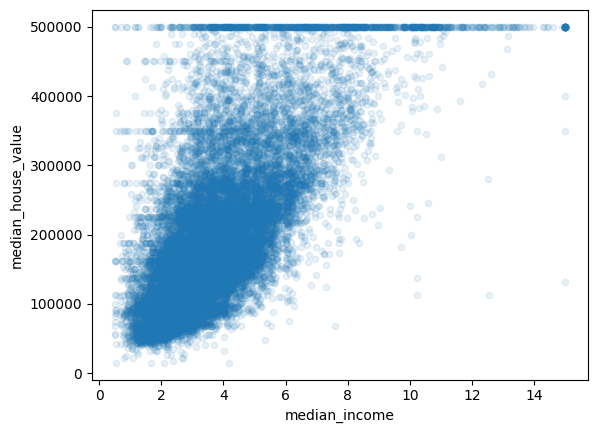

In [66]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Experimenting with attribute combinations

In [67]:
housing_copy["rooms_per_household"]= housing_copy["total_rooms"] / housing_copy["households"]
housing_copy["bedrooms_per_room"]= housing_copy["total_bedrooms"] / housing_copy["total_rooms"]
housing_copy["population_per_household"]= housing_copy["population"] / housing_copy["households"] #average population per household


In [68]:
corr_matrix = housing_copy.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Prepare data for ML algorithms

In [69]:
# seperate the predictors and labels since we don't want to necessarily apply the same transformation
# to predictors and target vaues 

housing = strat_train_set.drop("median_house_value", axis=1) # .drop() will create a copy of data
housing_labels = strat_train_set["median_house_value"].copy()

Data cleaning 
- deal with missing features

In [70]:
# housing.dropna(subset=["total_bedrooms"]) delete the districts with missing feature
# housing.drop("total_bedrooms",axis=1) delete the whole attribute 

# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True) fill it with the median value 

In [71]:
# use scikit-learn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") #replace each attribute's missing values with the median of that attribute

#since median only works on numerical attributes 
housing_num = housing.drop("ocean_proximity", axis=1) #copy of the data without the text atttribute 

imputer.fit(housing_num) # fit the imputer instance to the traning set

print(imputer.statistics_) #the median of each attribute is stored here
print(housing_num.median().values) # verify


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [ ]:
# transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_num)

# the result is a plain numpy array containing the transformed features

In [73]:
# pull it back into a Pandas Dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Handling text and categorical attributes

In [74]:
housing_cat = housing[["ocean_proximity"]] # returns a pandas dataframe that consists of only the ocean_proximity cat
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [75]:
# convert these categories from text to numbers 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [76]:
# get the list of categories, a 1D array of categories for each categorical attribute 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

to solve the bias problem in ordinal encoding, we will use one-hot encoding to convert categorial values into one-hot vectors 

In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [79]:
# to convert it to a dense Numpy array
np_housing_cat_1hot = housing_cat_1hot.toarray()
print(np_housing_cat_1hot)

#to get the list of categories
cat_encoder.categories_

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]